# Microéconomie 5
## TD3 : Équilibre et optimum

### Exercice 1 : Premier et deuxième théorèmes du bien-être dans le cas quasi-linéaire

Les dotations initiales sont $\omega^A = (1, 1)$ et $\omega^B = (1, 1)$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= \ln(x_1^A) + x_2^A \\
    U^B(x^B) &= 2\ln(x_1^B) + x_2^B.
\end{aligned}
    
Le code suivant commence par définir ces données du problème.

**Dans le code ci-dessous, vous pouvez modifier librement les dotations $\omega^A$ et $\omega^B$ pour voir comment cela affecte les résultats.**

In [1]:
omegaA <- c(1, 1)                            # dotation initiale de A
omegaB <- c(1, 1)                            # dotation initiale de B
omega1 <- omegaA[1] + omegaB[1]              # dotation totale en bien 1
omega2 <- omegaA[2] + omegaB[2]              # dotation totale en bien 2
UA <- function(x1, x2) log(x1) + x2          # fonction d'utilité de A
UB <- function(x1, x2) 2*log(x1) + x2        # fonction d'utilité de B

Reprenons le code de l'exercice 2 du TD2 pour tracer les courbes d'indifférence.

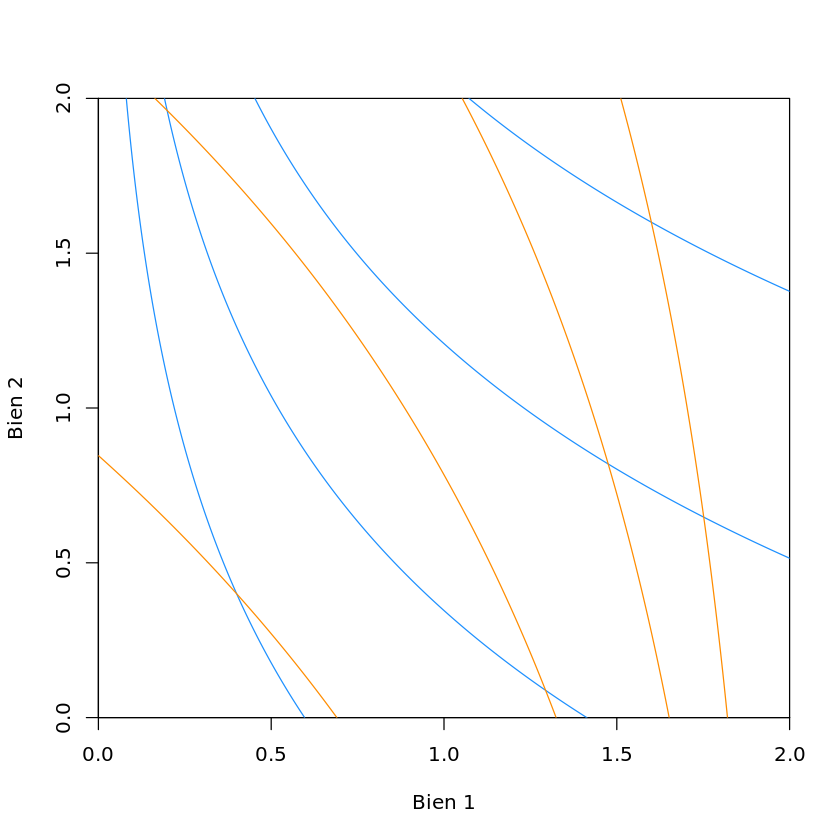

In [2]:
x1 <- seq(0, omega1, length=1000)

indiffA <- function(U) U - log(x1)
indiffB <- function(U) U - 2*log(x1)

niveauxA <- seq(UA(omega1/5, omega2/5), UA(4*omega1/5, 4*omega2/5), len = 4)
niveauxB <- seq(UB(omega1/5, omega2/5), UB(4*omega1/5, 4*omega2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, omega2))                # CI de A
for (U in niveauxB) lines(x1, rev(omega2 - indiffB(U)), col = "darkorange", ylim = c(0, omega2))  # CI de B

On cherche d'abord l'équilibre concurrentiel de cette économie. On traite ici **tous les cas** (même quand l'équilibre est en coin).

**1. Fonctions de demande**

Avec ces fonctions d'utilité, nous avions trouvé dans le TD2

\begin{equation}
    \boxed{ x_1^A(p) = \begin{cases}
        \frac{p_2}{p_1} \; &\text{si $p_2 \leq p \cdot \omega^A$} \\
        \frac{p \cdot \omega^A}{p_1} \; &\text{si $p_2 > p \cdot \omega^A$}
        \end{cases} }
    \quad \text{et} \quad
    \boxed{ x_2^A(p) = \begin{cases}
        \frac{p \cdot \omega^A - p_2}{p_2} \; &\text{si $p_2 \leq p \cdot \omega^A$} \\
        0 \; &\text{si $p_2 > p \cdot \omega^A$}
        \end{cases} }.
\end{equation}

et

\begin{equation}
    \boxed{ x_1^B(p) = \begin{cases}
        \frac{2 p_2}{p_1} \; &\text{si $2 p_2 \leq p \cdot \omega^B$} \\
        \frac{p \cdot \omega^B}{p_1} \; &\text{si $2 p_2 > p \cdot \omega^B$}
        \end{cases} }
    \quad \text{et} \quad
    \boxed{ x_2^B(p) = \begin{cases}
        \frac{p \cdot \omega^B - 2p_2}{p_2} \; &\text{si $2 p_2 \leq p \cdot \omega^B$} \\
        0 \; &\text{si $2 p_2 > p \cdot \omega^B$}
        \end{cases} }.
\end{equation}


**2. Équilibre du marché de bien 1**

À l'équilibre concurrentiel le marché du bien 1 doit être équilibré : $x_1^A(p) + x_1^B(p) = \omega_1^A + \omega_1^B$. Nous avons différentes expressions pour les demandes selon les valeurs de $p$, $\omega^A$, et $\omega^B$, donc il faut distinguer les cas. 


**Cas 1.** Si $p_2 \leq p \cdot \omega^A$ et $2 p_2 \leq p \cdot \omega^B$, alors l'équilibre du marché du bien 1 s'écrit

\begin{equation}
    \frac{p_2}{p_1} + \frac{2p_2}{p_1} = \omega_1 \iff \boxed{\frac{p_1}{p_2} = \frac{3}{\omega_1}} \overset{\text{A.N.}}{=} \frac{3}{19}.
\end{equation}

On peut vérifier que les hypothèses sur les prix faites au début du paragraphe ($p_2 \leq p \cdot \omega^A$ et $2 p_2 \leq p \cdot \omega^B$) sont alors vérifiées avec les allocations choisies ici, et donc on a bien un équilibre avec ce rapport des prix. On en déduit les allocations d'équilibre en réinjectant dans les fonctions de demande,

\begin{equation}
    \boxed{ x_1^A = \frac{\omega_1}{3} = \frac{19}{3}, \quad x_2^A = \frac{105}{19}, \qquad x_1^B = \frac{2 \omega_1}{3} = \frac{38}{3}, \quad x_2^B = \frac{85}{19} }.
\end{equation}

Mais selon les valeurs de $\omega^A$ et $\omega^B$, il y a trois autres cas avec équilibres en coin. Notez que cela va **au-delà du programme de cette classe**.


**Cas 2.** Si $p_2 > p \cdot \omega^A$ et $2 p_2 \leq p \cdot \omega^B$, alors l'équilibre du marché 1 s'écrit

\begin{equation}
    \frac{p \cdot \omega^A}{p_1} + \frac{2p_2}{p_1} = \omega_1 \iff \frac{p_1}{p_2} = \frac{\omega_2^A + 2}{\omega_1^B}.
\end{equation}

Pour que ce rapport des prix corresponde en effet à un équilibre, il faut qu'il vérifie les deux hypothèses faites en début de paragraphe. En prenant par exemple $p_1 = \omega_2^A + 2$ et $p_2 = \omega_1^B$, ces hypothèses peuvent se réécrire

\begin{aligned}
    p_2 > p \cdot \omega^A &\iff \frac{3}{\omega_1} \omega_1^A + \omega_2^A < 1 = \frac{3}{\omega_1} \frac{\omega_1}{3} \\
    2 p_2 \leq p \cdot \omega^B &\iff \omega_2 \omega_1^B \geq 0.
\end{aligned}

La deuxième hypothèse est donc toujours vérifiée à ce rapport des prix (quelles que soient les allocations initiales $\omega^A$ et $\omega^B$). La première hypothèse, en revanche, est vérifiée si et seulement si $A$ n'a pas les moyens d'acheter $x_1^A = \frac{\omega_1}{3}$ au taux d'échange $\frac{p_1}{p_2} = \frac{3}{\omega_1}$, c'est-à-dire si $A$ n'a pas assez de ressources pour atteindre l'équilibre du cas 1. Cela correspond donc au **coin inférieur gauche** de la boîte d'Edgeworth.


**Cas 3.** Si $p_2 \leq p \cdot \omega^A$ et $2 p_2 > p \cdot \omega^B$, alors l'équilibre du marché 1 s'écrit

\begin{equation}
    \frac{p_2}{p_1} + \frac{p \cdot \omega^B}{p_1} = \omega_1 \iff \frac{p_1}{p_2} = \frac{\omega_2^B + 1}{\omega_1^A}.
\end{equation}

Il faut de nouveau vérifier que ce rapport des prix correspond bien à un équilibre en vérifiant les deux hypothèses faites en début de paragraphe. En prenant par exemple $p_1 = \omega_2^B + 1$ et $p_2 = \omega_1^A$, ces hypothèses peuvent se réécrire

\begin{aligned}
    p_2 \leq p \cdot \omega^A &\iff \omega_2 \omega_1^A \geq 0 \\
    2 p_2 > p \cdot \omega^B &\iff \frac{3}{\omega_1} \omega_1^B + \omega_2^B < 2 = \frac{3}{\omega_1} \frac{2 \omega_1}{3}.
\end{aligned}

Cette fois c'est la première hypothèse qui est toujours vérifiée (quelles que soient les allocations initiales $\omega^A$ et $\omega^B$), tandis que la deuxième hypothèse est vérifiée si et seulement si $B$ n'a pas les moyens d'acheter $x_1^B = \frac{2\omega_1}{3}$ au taux d'échange $\frac{p_1}{p_2} = \frac{3}{\omega_1}$, c'est-à-dire si $B$ n'a pas assez de ressources pour atteindre l'équilibre du cas 1. Cela correspond donc au **coin supérieur droit** de la boîte d'Edgeworth.


**Cas 4.** Si $p_2 > p \cdot \omega^A$ et $2 p_2 > p \cdot \omega^B$, alors l'équilibre _du marché 2_ (plus simple) s'écrit

\begin{equation}
    0 + 0 = \omega_2 \Rightarrow \text{impossible}.
\end{equation}

Il n'y a donc pas d'équilibre pour des prix vérifiant ces hypothèses.

Représentons maintenant l'équilibre dans la boîte d'Edgeworth (cas interne seulement). Je définis en premier lieu les demandes de chaque agent selon le vecteur de prix `p` auquel ils font face, puis le rapport des prix à l'équilibre `r` selon la formule trouvée ci-dessus (la fonction `crossprod` correspond au produit scalaire).

In [4]:
x1A <- function(p) p[2]/p[1]
x2A <- function(p) (crossprod(p, omegaA) - p[2])/p[2]
x1B <- function(p) 2*p[2]/p[1]
x2B <- function(p) (crossprod(p, omegaB) - 2*p[2])/p[2]
r <- 3/omega1

Je définis l'allocation $I$ de départ, ainsi que l'allocation d'équilibre $E$ (j'utilise $p_1 =$ `r` et $p_2 = 1$).

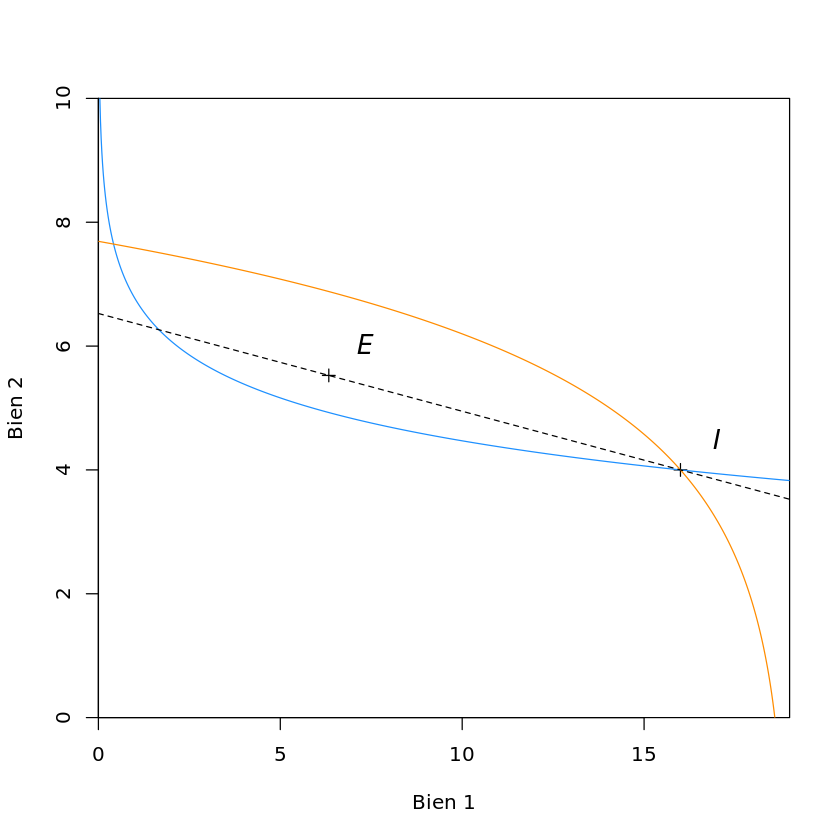

In [5]:
I <- omegaA                                   # dotations initiales
E <- c(x1A(c(r, 1)), x2A(c(r, 1)))            # équilibre concurrentiel

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                              # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))              # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # indiff. B
#lines(x1, optima(x1), col = "purple", lwd = 1)  # courbe des optima
lines(x1, r*omegaA[1] + omegaA[2] - r*x1, lty = 2)                                       # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                                # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)

De nouveau, essayons de tracer la courbe des optima selon la méthode vue au TD1 (en violet).

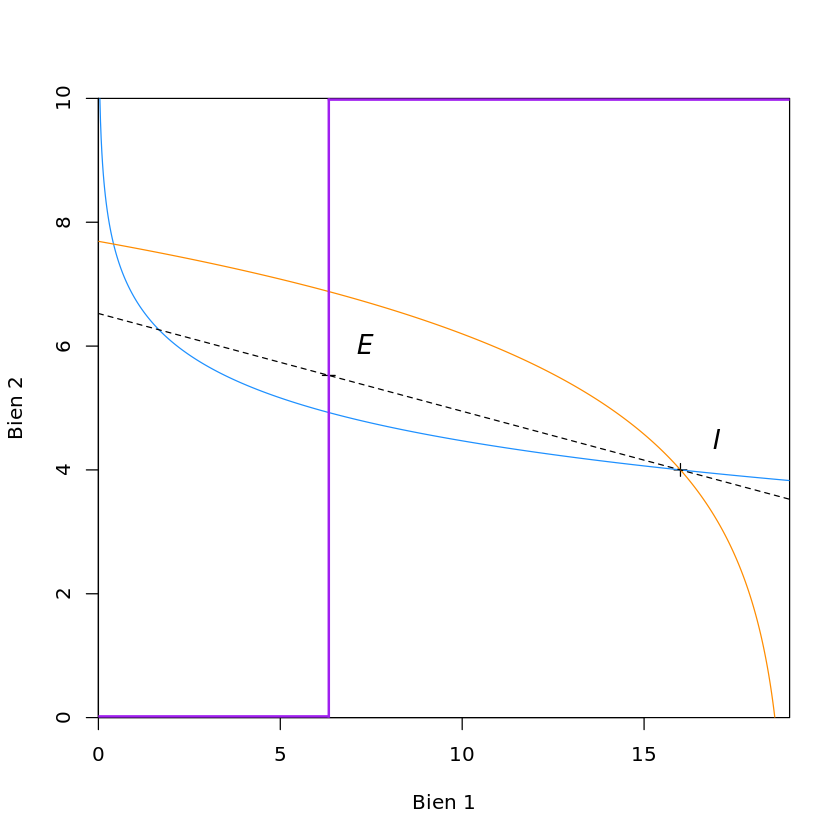

In [7]:
plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                              # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))              # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # indiff. B

lines(x1, r*omegaA[1] + omegaA[2] - r*x1, lty = 2)                                       # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                                # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)

lines(c(omega1/3, omega1/3), c(0, omega2), lwd = 2, col = "purple")                      # optima intérieurs
lines(c(omega1/3, omega1), c(omega2, omega2)-.002*omega2, lwd = 2, col = "purple")       # optima en coin : x2A = 0
lines(c(0, omega1/3), c(0, 0)+.002*omega2, lwd = 2, col = "purple")                      # optima en coin : x2B = 0

On observe encore que **l'allocation d'équilibre concurrentiel est un optimum de Pareto**, c'est-à-dire le premier théorème du bien-être.